In [43]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# 1. Read in data set, explore

In [44]:
# Load the processed data

df_telecom = pd.read_csv('../telecom_data1.csv')

In [45]:
df_telecom.head(3)

,ID,Customer_id,Interaction,UID,zip,Lat,Lng,City,State,Population,County,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,fav_color,Credit_card,Churn,Gender,SeniorCitizen,Contract,Partner,Depend,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,TotalCharge,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,4cb75839-4807-45e3-a9da-794e9ce53972,34536072f30ba5acb148becdfc5a0c34,23176,37.57039,-76.42148,Wake,VA,331,Middlesex,Urban,America/New_York,"Production designer, theatre/television/film",1,68,Regular High School Diploma,Full Time,21242.88,Married,DarkCyan,JCB 16 digit,Yes,Female,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,89.979239,577.760466,3,3,2,2,2,4,2,3
1,2,S120509,84632dbc-39c2-4b11-b840-577fd97ef223,2a6346e985cb7a3f29678436fcd66912,30114,34.24692,-84.52571,Canton,GA,53210,Cherokee,Suburban,America/New_York,Radiation protection practitioner,0,70,Associate's Degree,Full Time,5832.98,Married,LightPink,VISA 16 digit,No,Male,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,94.973002,138.171459,2,2,2,3,4,1,2,2
2,3,K191035,cf372768-93dc-4021-a0c0-8222b6f5d53b,8eebc9f5cdff8d844fa63f873954d459,25253,38.92317,-81.96954,Letart,WV,2230,Mason,Urban,America/New_York,Industrial/product designer,1,86,Associate's Degree,Student,39798.11,Married,OldLace,Mastercard,Yes,Male,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,99.947583,1587.135294,2,3,3,2,4,2,2,3


In [46]:
#df_telecom.describe()
#df_telecom.dtypes

In [47]:
X = df_telecom.copy()
print(X.shape)

(10000, 50)


# 2. Feature Engineering

## Variable transformation 

In [48]:
# transform zip to categorical

X['zip']= X['zip'].astype('str')

## Variable selection

### Continuous variables

In [49]:
# Cont cols (normalize for KNN)

# Continuous cols (normalize-for KNN)
cols_cont = ['Population', 'Children', 'Lat', 'Lng', 'Income', 'Age', 'Tenure', 'TotalCharge'] #leave out monthlycharge
X_cont = X[cols_cont]
X_cont.head(3)

,Population,Children,Lat,Lng,Income,Age,Tenure,TotalCharge
0,331,1,37.57039,-76.42148,21242.88,68,6.795513,577.760466
1,53210,0,34.24692,-84.52571,5832.98,70,1.156681,138.171459
2,2230,1,38.92317,-81.96954,39798.11,86,15.754144,1587.135294


### Categorical variables

In [50]:
# Cat cols-full list

cols_cat_all = X.loc[:, X.dtypes == np.object].columns.values.tolist() #have to translate back to list format
cols_cat_all = cols_cat_all[3:] #remove the first three cols, related to cust ID


In [51]:
# Cat cols-only those with limited tot unique value (otherwise too many categories created for dummies)

t = X[cols_cat_all].nunique().sort_values(ascending=False)
t = t.loc[lambda t: t < 20]  # change value to what is desired here, from 20
cols_cat_all_red = t.index.values.tolist()
X[cols_cat_all_red].nunique().to_frame('tot unique') #updated reduced list 


,tot unique
Education,12
Credit_card,10
Employment,5
Marital,5
PaymentMethod,4
Area,3
InternetService,3
Contract,3
Partner,2
OnlineBackup,2


In [52]:
# 1. Create dummies-for categorical cols (use reduced col list)

X_cat_red = pd.get_dummies(X[cols_cat_all_red], drop_first=True) # drop first as it is redundant
print('number of cat cols chosen: ', X[cols_cat_all_red].shape[1])
print('total cat cols after one hot encoding: ', X_cat_red.shape[1])
X_cat_red.head(3)

number of cat cols chosen:  22
total cat cols after one hot encoding:  51


,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Credit_card_Diners Club / Carte Blanche,Credit_card_Discover,Credit_card_JCB 15 digit,Credit_card_JCB 16 digit,Credit_card_Maestro,Credit_card_Mastercard,Credit_card_VISA 13 digit,Credit_card_VISA 16 digit,Credit_card_Voyager,Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Area_Suburban,Area_Urban,InternetService_Fiber Optic,InternetService_None,Contract_One year,Contract_Two Year,Partner_Yes,OnlineBackup_Yes,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes,DeviceProtection_Yes,Multiple_Yes,OnlineSecurity_Yes,Phone_Yes,Depend_Yes,Churn_Yes,Gender_Male,PaperlessBilling_Yes,SeniorCitizen_Yes
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,0,1,1,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,1,1,1


In [53]:
# 2. Label encode-all categorical cols

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X_cat_all = X[cols_cat_all].apply(le.fit_transform)
print('number of cat cols (all): ', X[cols_cat_all].shape[1])
print('total cat cols (all) after one hot encoding: ', X_cat_all.shape[1])
X_cat_all.head(3) 

number of cat cols (all):  29
total cat cols (all) after one hot encoding:  29


,zip,City,State,County,Area,Timezone,Job,Education,Employment,Marital,fav_color,Credit_card,Churn,Gender,SeniorCitizen,Contract,Partner,Depend,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,1277,5701,46,934,2,16,461,9,0,1,22,4,1,0,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1
1,1984,785,10,275,1,16,494,1,0,1,69,8,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0
2,1479,2992,50,886,2,16,316,1,3,1,96,6,1,1,1,2,1,0,0,1,1,0,0,0,0,0,1,1,1


In [54]:
# Join Cat and Noncat together

X_all_ind = pd.concat([X_cont, X_cat_red],axis=1)
X_all = pd.concat([X_cont, X_cat_all],axis=1)

print('total cols for final df, one hot eoncded cat cols: ', X_all_ind.shape[1]) 
print('total cols for final df, all cat cols: ',X_all.shape[1])
#X_all.head()

total cols for final df, one hot eoncded cat cols:  59
total cols for final df, all cat cols:  37


In [14]:
# Market Basket Set-to be completed

# cols_MB = ['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

# X_MB = X[cols_MB].apply(le.fit_transform) #label encode (to transform yes/no to 0/1)
# print('number of cat cols in MB: ', X[cols_MB].shape[1])
# print('total cat cols in MB after one hot encoding: ', X_MB.shape[1])
# X_MB.head(3) 

# Unspervised Modeling Techniques

# 1. PCA

This section covers PCA Analysis

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Standardize the continous col before PCA

scaler = MinMaxScaler()
X_cont_std = scaler.fit_transform(X_cont)

### Run twice, 2nd time after you determine # components (below)

In [56]:
# Fit PCA model (for specific cum variance)

from sklearn.decomposition import PCA

# use these for % threshold
# percent=.85
# pca = PCA(n_components=percent)

# use this for all components (first run)
pca = PCA()

pca.fit(X_cont_std)
X_pca = pca.transform(X_cont_std)

print("original cols:   ", X_cont.shape[1])
print("prin comp cols:", X_pca.shape[1])

original cols:    8
prin comp cols: 8


In [57]:
print('Number of components: ', pca.n_components_)
print('% explained variance: ', sum(pca.explained_variance_ratio_))

Number of components:  8
% explained variance:  1.0


In [58]:
# Print principle components 

print('Explained Variance Ratio')
for i in range(pca.n_components_):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.543567414188633
PC2: 0.1960981305757725
PC3: 0.10795919634660406
PC4: 0.05228280603388298
PC5: 0.04091785411378702
PC6: 0.03486589598092734
PC7: 0.022031770781831883
PC8: 0.0022769319785612254


## Scree plot (choose number of components)

Text(0.8, 0.85, '90% cut-off threshold')

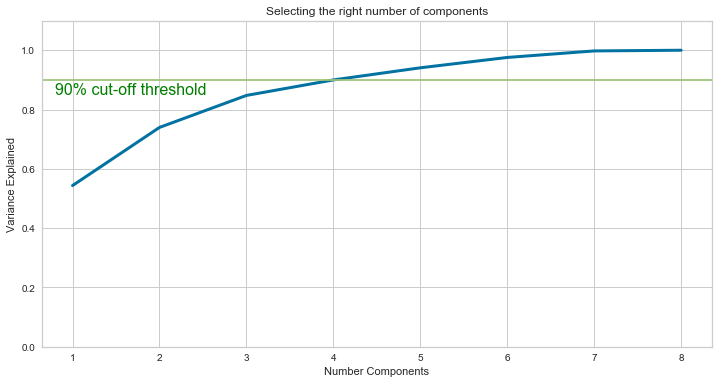

In [59]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)
pca = PCA()
pca.fit(X_cont_std)

cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.arange(len(cumsum))+1

plt.plot(dim,cumsum,'-',lw=3);

plt.xlabel('Number Components')
plt.ylabel('Variance Explained')
plt.title('Selecting the right number of components')

plt.xticks([1,2,3,4,5,6,7,8])
plt.ylim([0,1.1]);

# add horizontal cuoff line, @ 95%
plt.axhline(y=0.90, color='g', linestyle='-')
plt.text(0.8,.85, '90% cut-off threshold', color = 'green', fontsize=16)



# 2. Clustering

This section covers clustering

## Kmeans clustering

## Kmeans-with continous and one hot encoded cols

In [60]:
# Kmeans on X cont cols + one hot encoded categorical cols (i.e., X_all_ind)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_all_ind)
y_kmeans = kmeans.predict(X_all_ind) #predict cluster for each observation

In [61]:
# This prints the cluster labels of each data point (total 1000)

print(kmeans.labels_) #alt to y_kmeans

[1 2 0 ... 2 1 0]


## Choose number of clusters-Silhouette and Scree (Extra)

### 1. Inertia

Based on Within-Cluster-Sum-of-Squares (WCSS)

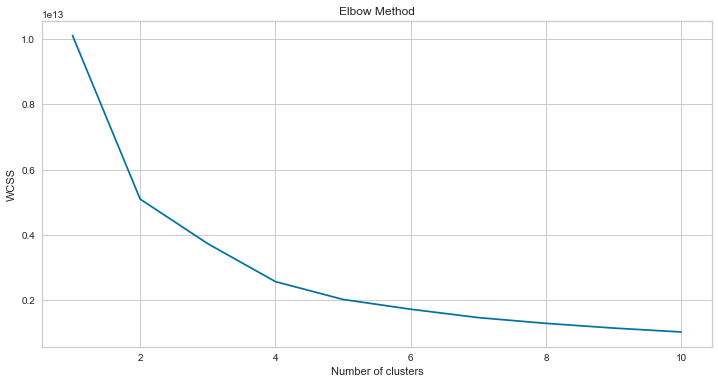

In [62]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X_all_ind)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 2. Silhouette

Based on max silhouette score

In [63]:
from sklearn.metrics import silhouette_score

# a value between [-1, 1], with 1 being best, -1 worst (0 means there are overlapping clusters)

print(silhouette_score(X_all_ind, kmeans.labels_))

0.3839984778564964


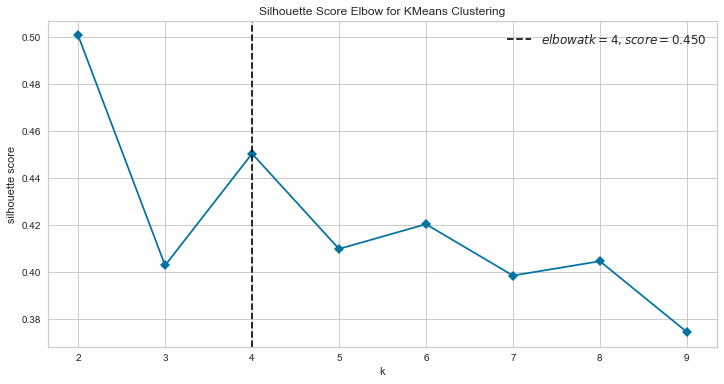

In [64]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X_all_ind)    
visualizer.poof()  

## Fit kmeans on PCA components-for visualization (Extra)

/Users/joehaber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


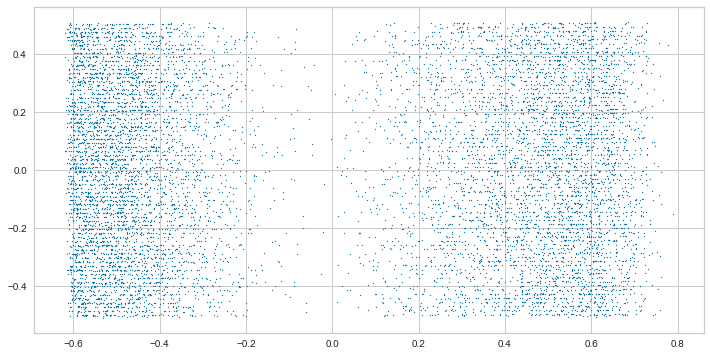

In [65]:
# Scatter 2 PCA components

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1);

In [66]:
# Kmeans on 2 PCA components (obtained from above)

kmeans = KMeans(n_clusters=2) # 2 clusters only based on scatter of data above
kmeans.fit(X_pca[:,:2])
y_kmeans = kmeans.predict(X_pca[:,:2])  


In [67]:
# This shows cluster centers (total 4) based on 2 components

kmeans.cluster_centers_   

array([[ 0.46393808,  0.00054884],
       [-0.4641237 , -0.00054906]])

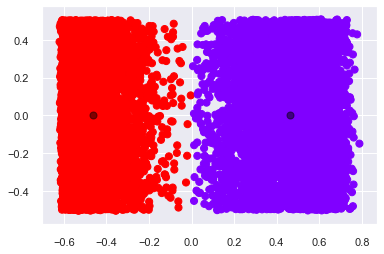

In [68]:
# Scatter PCA components with clusters (after kmeans)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='rainbow')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

## Hierarchical clustering

In [69]:
from sklearn.cluster import AgglomerativeClustering

In [70]:
groups = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

groups .fit_predict(X_all_ind)

array([0, 0, 0, ..., 0, 0, 1])

## Dendogram for number of clusters

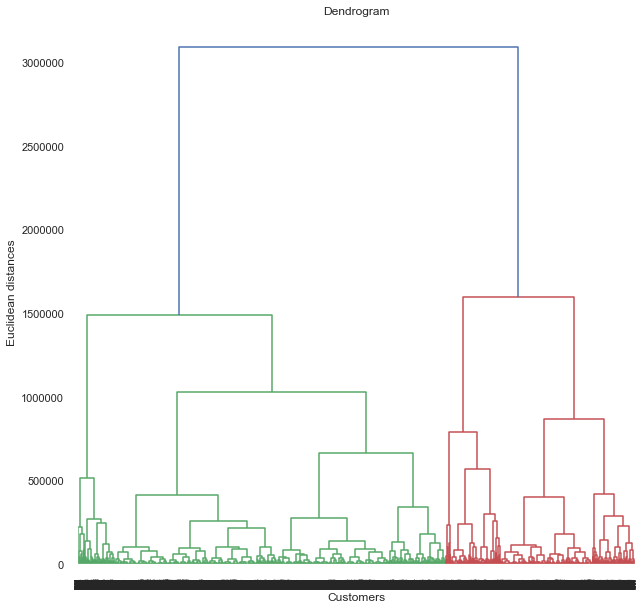

In [71]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X_all_ind, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### based on dendogram, the number of clusters should be 3

# 3. Market Basket (to be completed)

This section covers Market Basket Analysis

In [136]:
from mlxtend.frequent_patterns import apriori, association_rules

In [137]:
X_MB.head(3)

NameError: name 'X_MB' is not defined

In [19]:
# Apriori algorithm

frequent_itemsets = apriori(X_MB, min_support=0.07, use_colnames=True)

In [ ]:
# Freq item sets

frequent_itemsets.head(7)

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules.head()

In [ ]:
# Get rules set

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

In [ ]:
# Filter rules set

rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]